In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = pd.read_csv("fraud_call (1).file", sep='\t', names=['label', 'content'], on_bad_lines='skip')

df.sample(5)

,label,content
825,normal,Hey what's up charles sorry about the late reply.
2383,normal,"Chinatown got porridge, claypot rice, yam cake..."
5555,fraud,Had your mobile 11mths ? Update for FREE to Or...
5679,normal,Dude im no longer a pisces. Im an aquarius now.
4147,normal,Was gr8 to see that message. So when r u leavi...


In [5]:
df.shape

(5924, 2)

## 1. <b>Data Cleaning</b>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5924 entries, 0 to 5923
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5924 non-null   object
 1   content  5924 non-null   object
dtypes: object(2)
memory usage: 92.7+ KB


In [10]:
# renaming the columns to make them more descriptive
df.rename(columns={'label':'target','content':'text'},inplace=True)
df

,target,text
0,fraud,"hello, i m bank manager of SBI, ur debit card ..."
1,fraud,Todays Vodafone numbers ending with 4882 are s...
2,normal,Please don't say like that. Hi hi hi
3,normal,Thank you!
4,normal,Oh that was a forwarded message. I thought you...
...,...,...
5919,fraud,to get 1000 INR voucher please call on 8898655...
5920,fraud,to get free access of google cloud account hit...
5921,fraud,to get free AWS cloud account hit on given mes...
5922,fraud,to get free access of Microsoft Azure hit on g...


In [12]:
# now converting the normal and fraud into 0 and 1 using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = df['target'].map(lambda x: 1 if x == 'fraud' else 0)
df

,target,text
0,1,"hello, i m bank manager of SBI, ur debit card ..."
1,1,Todays Vodafone numbers ending with 4882 are s...
2,0,Please don't say like that. Hi hi hi
3,0,Thank you!
4,0,Oh that was a forwarded message. I thought you...
...,...,...
5919,1,to get 1000 INR voucher please call on 8898655...
5920,1,to get free access of google cloud account hit...
5921,1,to get free AWS cloud account hit on given mes...
5922,1,to get free access of Microsoft Azure hit on g...


In [14]:
# df['target'] = encoder.fit_transform(df['target'])

In [15]:
# print(encoder.classes_)

In [16]:
df

,target,text
0,1,"hello, i m bank manager of SBI, ur debit card ..."
1,1,Todays Vodafone numbers ending with 4882 are s...
2,0,Please don't say like that. Hi hi hi
3,0,Thank you!
4,0,Oh that was a forwarded message. I thought you...
...,...,...
5919,1,to get 1000 INR voucher please call on 8898655...
5920,1,to get free access of google cloud account hit...
5921,1,to get free AWS cloud account hit on given mes...
5922,1,to get free access of Microsoft Azure hit on g...


In [17]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check for duplicate values
df.duplicated().sum()

314

In [19]:
# remove duplicate
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

## 2.EDA

In [22]:
df['target'].value_counts()

target
0    5013
1     597
Name: count, dtype: int64

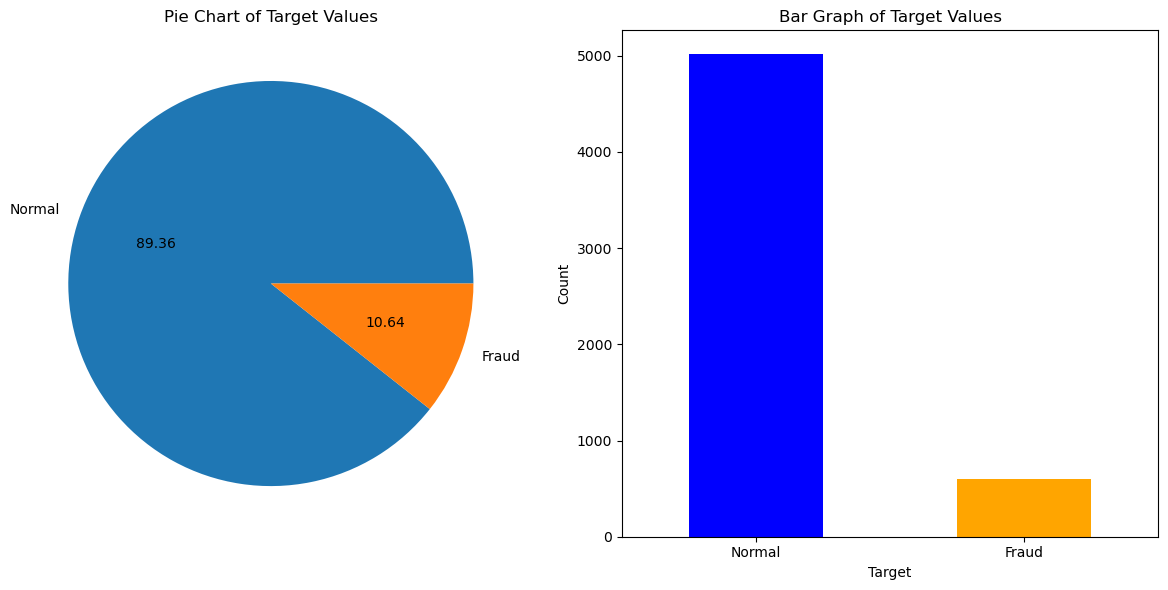

In [23]:
import matplotlib.pyplot as plt

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axes[0].pie(df['target'].value_counts(), labels=['Normal', 'Fraud'], autopct="%0.2f")
axes[0].set_title("Pie Chart of Target Values")

# Bar graph
df['target'].value_counts().plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title("Bar Graph of Target Values")
axes[1].set_xlabel("Target")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0, 1])  # Set x-ticks if needed
axes[1].set_xticklabels(['Normal', 'Fraud'], rotation=0)

# Display the plots
plt.tight_layout()
plt.show()


In [24]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# Add a new column for the number of characters
df.loc[:, 'No_of_characters'] = df['text'].apply(len)

C:\Users\adars\AppData\Local\Temp\ipykernel_34144\2256577459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'No_of_characters'] = df['text'].apply(len)


In [26]:
# Add a new column for the number of words
df.loc[:,'No_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\adars\AppData\Local\Temp\ipykernel_34144\2315012841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'No_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [27]:
df.loc[:,'No_of_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\adars\AppData\Local\Temp\ipykernel_34144\323769870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'No_of_sentence'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [28]:
df

,target,text,No_of_characters,No_of_words,No_of_sentence
0,1,"hello, i m bank manager of SBI, ur debit card ...",97,24,1
1,1,Todays Vodafone numbers ending with 4882 are s...,148,27,2
2,0,Please don't say like that. Hi hi hi,36,10,2
3,0,Thank you!,10,3,1
4,0,Oh that was a forwarded message. I thought you...,63,15,2
...,...,...,...,...,...
5919,1,to get 1000 INR voucher please call on 8898655...,52,10,1
5920,1,to get free access of google cloud account hit...,73,15,1
5921,1,to get free AWS cloud account hit on given mes...,60,13,1
5922,1,to get free access of Microsoft Azure hit on g...,68,14,1


<Axes: xlabel='No_of_characters', ylabel='Count'>

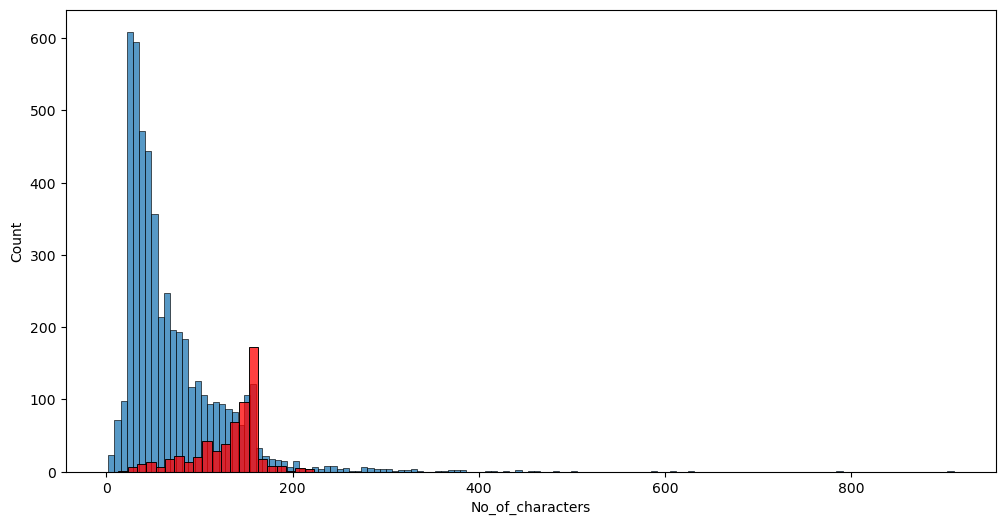

In [29]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['No_of_characters'])
sns.histplot(df[df['target']==1]['No_of_characters'], color='red')

## 3. Data Preprocessing
<ul>
    <li>Lower Casing </li>
    <li>Tokenization</li>
    <li>Removing Special Characters</li>
    <li>Removing stop words and punctuations</li>
    <li>Stemming</li>
</ul>

In [31]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [32]:
# making a function which include all the steps

def transform_text(text):
    # lowercase
    text = text.lower()

    # tokensization
    text = nltk.word_tokenize(text)

    # removing special characters and taking only alphanumeric characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()

    # removing stopwords and puncuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    # stemming
    ps = PorterStemmer()
    for i in text:
         y.append(ps.stem(i))
    
    return " ".join(y)
    

In [33]:
transform_text("Adarsh Keep doing the work , one day you will definitely get what you want. God is with you always") 

'adarsh keep work one day definit get want god alway'

In [34]:
df.loc[:,'transformed_text'] = df['text'].apply(transform_text)

C:\Users\adars\AppData\Local\Temp\ipykernel_34144\2537418861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'transformed_text'] = df['text'].apply(transform_text)


In [35]:
df.head()

,target,text,No_of_characters,No_of_words,No_of_sentence,transformed_text
0,1,"hello, i m bank manager of SBI, ur debit card ...",97,24,1,hello bank manag sbi ur debit card expir would...
1,1,Todays Vodafone numbers ending with 4882 are s...,148,27,2,today vodafon number end 4882 select receiv aw...
2,0,Please don't say like that. Hi hi hi,36,10,2,pleas say like hi hi hi
3,0,Thank you!,10,3,1,thank
4,0,Oh that was a forwarded message. I thought you...,63,15,2,oh forward messag thought send


## 4. Model Building

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer() # Bag of words
tfidf = TfidfVectorizer(max_features=2000) # TF-IDF values

In [38]:
!pip install TextBlob
from textblob import TextBlob

In [39]:
def calculate_sentiment_scores(text_data):
    sentiment_scores = []
    for text in text_data:
        blob = TextBlob(text)
        sentiment_scores.append([blob.sentiment.polarity, blob.sentiment.subjectivity])
    return np.array(sentiment_scores)

In [40]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [41]:
X.shape

(5610, 2000)

In [42]:
XX = calculate_sentiment_scores(df['transformed_text'])

In [43]:
print(XX.shape)
XX

(5610, 2)


array([[0.13636364, 0.45454545],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [0.4       , 0.8       ],
       [0.4       , 0.8       ],
       [0.        , 0.        ]])

In [44]:
X = np.hstack((X, XX))

In [45]:
X.shape

(5610, 2002)

In [46]:
y = df['target'].values

In [47]:
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,f1_score

In [51]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [52]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
# mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()

In [53]:
all_models = {
    'SVC':svc,
    'KN':knc,
    # 'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'Rf':rfc,
    'AdaBoost':abc,
    'BagC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracys = accuracy_score(y_test,y_pred)
    precisions = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracys,precisions,recall,f1

In [60]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.893048128342246, 0.5354330708661418, 0.5271317829457365, 0.53125)

## Final Result

In [63]:
accuracy_score_list = []
precision_score_list = []
recall_score_list = []
F1_score_list = []

for name,clf in all_models.items():
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_score_list.append(current_accuracy)
    precision_score_list.append(current_precision)
    recall_score_list.append(current_recall)
    F1_score_list.append(current_f1)
    

For  SVC
Accuracy -  0.893048128342246
Precision -  0.5354330708661418
For  KN
Accuracy -  0.9456327985739751
Precision -  0.9857142857142858
For  DT
Accuracy -  0.9438502673796791
Precision -  0.9024390243902439
For  LR
Accuracy -  0.9590017825311943
Precision -  0.9278350515463918
For  Rf
Accuracy -  0.9759358288770054
Precision -  0.9903846153846154


C:\Users\adars\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9625668449197861
Precision -  0.9223300970873787
For  BagC
Accuracy -  0.9616755793226381
Precision -  0.864406779661017
For  ETC
Accuracy -  0.9795008912655971
Precision -  0.9818181818181818
For  GBDT
Accuracy -  0.964349376114082
Precision -  0.9587628865979382
For  XGB
Accuracy -  0.9750445632798574
Precision -  0.9719626168224299


In [64]:
performance_df = pd.DataFrame({'Algorithm':all_models.keys(),'Accuracy':accuracy_score_list,'Precision':precision_score_list,'Recall':recall_score_list,'F1 score':F1_score_list}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1 score
7,ETC,0.979501,0.981818,0.837209,0.903766
4,Rf,0.975936,0.990385,0.798450,0.884120
9,XGB,0.975045,0.971963,0.806202,0.881356
8,GBDT,0.964349,0.958763,0.720930,0.823009
5,AdaBoost,0.962567,0.922330,0.736434,0.818966
6,BagC,0.961676,0.864407,0.790698,0.825911
3,LR,0.959002,0.927835,0.697674,0.796460
1,KN,0.945633,0.985714,0.534884,0.693467
2,DT,0.943850,0.902439,0.573643,0.701422
0,SVC,0.893048,0.535433,0.527132,0.531250


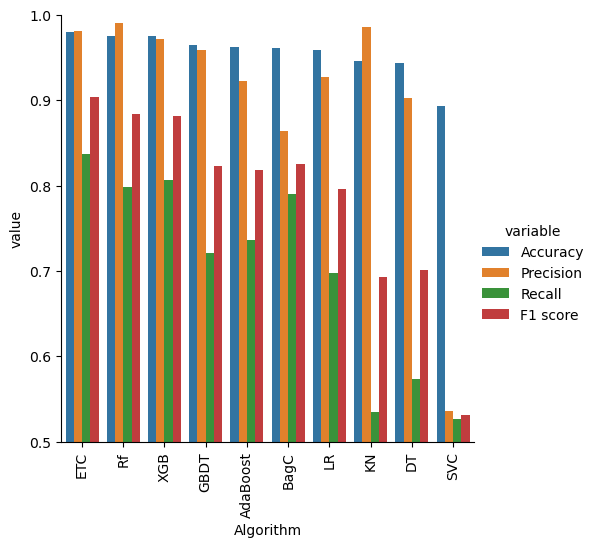

In [65]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x='Algorithm', y='value',
            hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

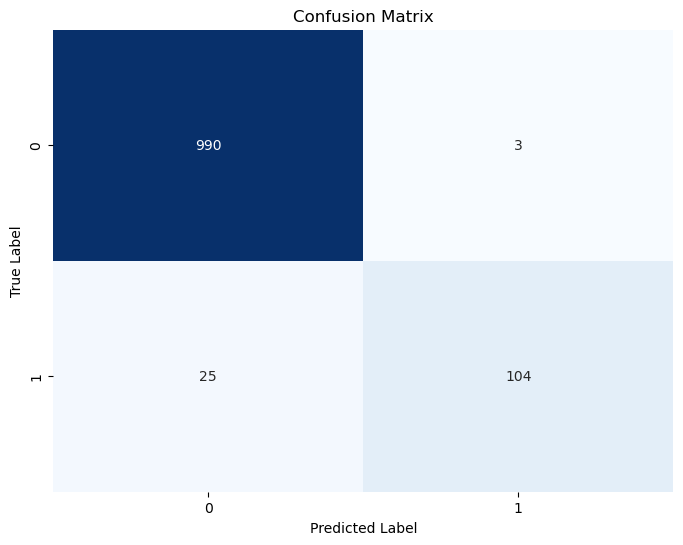

In [67]:
etc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


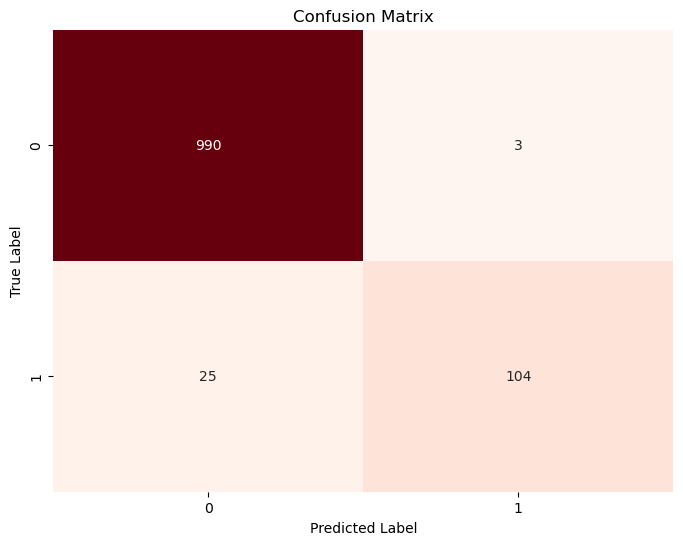

In [75]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False, 
                xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

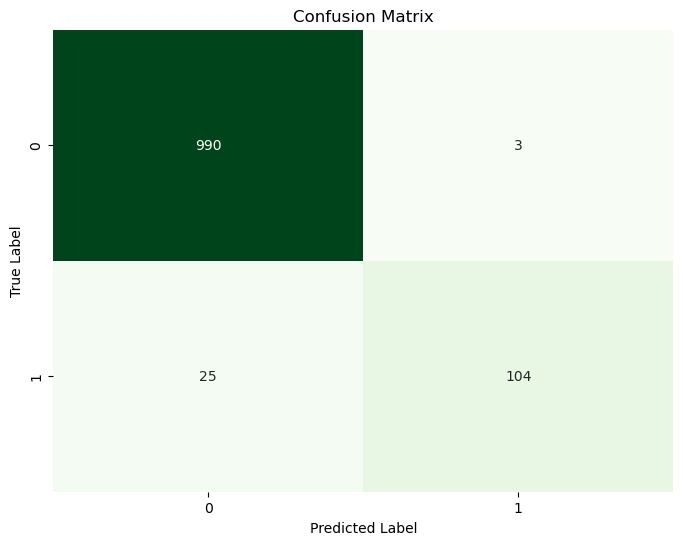

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, 
                xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()